## IRIS 데이터셋을 이용한 퍼셉트론 구현

1. IRIS 데이터셋을 로드하시오.

2. 로드한 데이터 셋을 학습용/검증용(train/test)으로 나누시오

3. 학습용 데이터를 PCA를 이용하여 2차원으로 차원 축소를 진행하시오,.

4. 2차원으로 축소된 데이터로 붓꽃을 분류하는 퍼셉트론 알고리즘을 학습을 통해 구현하시오.

5. 검증용 셋으로 검증을 수행하시오.

In [41]:
# iris
from sklearn.datasets import load_iris
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

iris_data = load_breast_cancer()

X = iris_data.data
y = iris_data.target


X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=1/3)

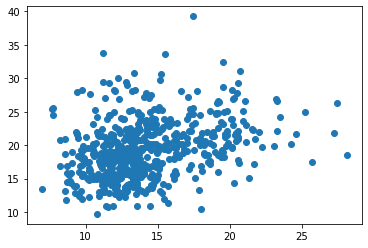

In [42]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])

In [47]:
from sklearn.decomposition import PCA

# n_components : 재구성할 차원 수
pca = PCA(n_components=2)

# 고유 벡터의 축을 찾는다
pca.fit(X)

# 축에 맞게 변화된다
X_pca = pca.transform(X)
print(X_pca)

[[1160.1425737  -293.91754364]
 [1269.12244319   15.63018184]
 [ 995.79388896   39.15674324]
 ...
 [ 314.50175618   47.55352518]
 [1124.85811531   34.12922497]
 [-771.52762188  -88.64310636]]


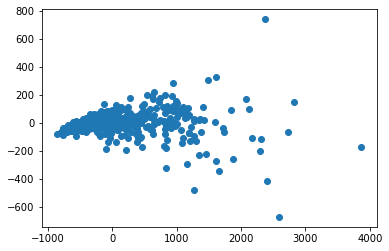

In [48]:
plt.scatter(X_pca[:,0], X_pca[:,1])

In [49]:
pca.explained_variance_

array([443782.6051466 ,   7310.10006165])

In [50]:
# 고유벡터의 어느 축으로 얼마나 흩어져 있는지 백분율
# 두번째 축은 정보가 얼마 없네~
# [1차원, 2차원]
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [51]:
print(iris_data.feature_names)
print(iris_data.target_names)
print(iris_data.DESCR)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
 

In [3]:
import pandas as pd
df = pd.DataFrame(X, columns = iris_data.feature_names)
df["target"] = y

# units의 수
print(len(df["target"].unique()))

# input_shape의 수
print(len(iris_data.feature_names))

df

3
4


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X_train)

iris_pca_train = pca.transform(X_train) # Train입력


In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X_test)

iris_pca_test = pca.transform(X_test) # Test입력 

In [26]:
iris_pca_test

array([[-0.22076943,  0.30646406],
       [ 1.52201038,  0.10219503],
       [ 2.37344318, -0.17084102],
       [-2.50943024,  0.20929643],
       [-2.55466851, -0.14515852],
       [-2.75249957,  0.15011288],
       [ 0.45055121,  0.29461185],
       [ 0.54738359,  0.65511015],
       [ 2.68325184, -0.61098645],
       [ 0.01962239,  0.65060235],
       [ 0.86644514, -0.1427507 ],
       [-2.66840869,  0.34085604],
       [-2.55682173,  0.22305852],
       [-2.54439034, -1.03343254],
       [-2.34257735, -0.13540972],
       [-2.55442452, -0.6215641 ],
       [ 1.00046488, -0.5305583 ],
       [-2.63605207,  0.24572191],
       [-2.44092832, -0.63117308],
       [ 1.86559043,  0.45842003],
       [ 0.65615288,  0.54243343],
       [ 0.72927136,  0.39177605],
       [ 3.46911073, -0.63541818],
       [-0.61590727,  0.98026916],
       [ 1.00008075, -0.33398666],
       [ 1.35689026, -0.76081767],
       [ 1.3827872 ,  0.2486993 ],
       [ 1.03528483,  0.43233673],
       [ 0.59604969,

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X_train)
pca.fit(X_test)
iris_pca_train = pca.transform(X_train) # Train입력
iris_pca_test = pca.transform(X_test) # Test입력 

In [33]:
from tensorflow.keras import models, layers


# 여러 레이어를 쌓겠다.
model = models.Sequential()

model.add(layers.Dense(units = 256, activation="relu", input_shape=(2,)))
#model.add(layers.Dropout(0.5)) # 드롭아웃 : 오버피팅 막는법
model.add(layers.Dense(units = 128, activation="relu"))

model.add(layers.Dense(units = 64, activation="relu"))

model.add(layers.Dense(units = 32, activation="relu"))

model.add(layers.Dense(units = 1,  activation='linear'))



model.compile(optimizer='adam',
             loss = "mse",
             metrics = ['acc'])

model.fit(iris_pca_train, y_train, epochs = 1000, batch_size = 1, verbose = 1)

Epoch 1/1000
100/100 [==============================] - 0s 880us/step - loss: 0.2931 - acc: 0.6100
Epoch 2/1000
100/100 [==============================] - 0s 860us/step - loss: 0.0919 - acc: 0.6500
Epoch 3/1000
100/100 [==============================] - 0s 820us/step - loss: 0.0813 - acc: 0.6600
Epoch 4/1000
100/100 [==============================] - 0s 820us/step - loss: 0.0954 - acc: 0.6600
Epoch 5/1000
100/100 [==============================] - 0s 940us/step - loss: 0.0605 - acc: 0.6600
Epoch 6/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.0529 - acc: 0.6600
Epoch 7/1000
100/100 [==============================] - 0s 940us/step - loss: 0.0533 - acc: 0.6600
Epoch 8/1000
100/100 [==============================] - 0s 790us/step - loss: 0.0702 - acc: 0.6600
Epoch 9/1000
100/100 [==============================] - 0s 810us/step - loss: 0.0553 - acc: 0.6600
Epoch 10/1000
100/100 [==============================] - 0s 790us/step - loss: 0.0588 - acc: 0.6600
Epoch 11/10

100/100 [==============================] - 0s 870us/step - loss: 0.0334 - acc: 0.6600
Epoch 81/1000
100/100 [==============================] - 0s 810us/step - loss: 0.0431 - acc: 0.6600
Epoch 82/1000
100/100 [==============================] - 0s 820us/step - loss: 0.0362 - acc: 0.6600
Epoch 83/1000
100/100 [==============================] - 0s 750us/step - loss: 0.0297 - acc: 0.6600
Epoch 84/1000
100/100 [==============================] - 0s 770us/step - loss: 0.0363 - acc: 0.6600
Epoch 85/1000
100/100 [==============================] - 0s 810us/step - loss: 0.0287 - acc: 0.6600
Epoch 86/1000
100/100 [==============================] - 0s 980us/step - loss: 0.0289 - acc: 0.6600
Epoch 87/1000
100/100 [==============================] - 0s 880us/step - loss: 0.0354 - acc: 0.6600
Epoch 88/1000
100/100 [==============================] - 0s 820us/step - loss: 0.0295 - acc: 0.6600
Epoch 89/1000
100/100 [==============================] - 0s 760us/step - loss: 0.0254 - acc: 0.6600
Epoch 90/1000


100/100 [==============================] - 0s 820us/step - loss: 0.0034 - acc: 0.6600
Epoch 243/1000
100/100 [==============================] - 0s 860us/step - loss: 0.0097 - acc: 0.6600 
Epoch 244/1000
100/100 [==============================] - 0s 760us/step - loss: 0.0057 - acc: 0.6600
Epoch 245/1000
100/100 [==============================] - 0s 670us/step - loss: 0.0124 - acc: 0.6600
Epoch 246/1000
100/100 [==============================] - 0s 830us/step - loss: 0.0015 - acc: 0.6600 
Epoch 247/1000
100/100 [==============================] - 0s 850us/step - loss: 0.0022 - acc: 0.6600 
Epoch 248/1000
100/100 [==============================] - 0s 700us/step - loss: 0.0162 - acc: 0.6600
Epoch 249/1000
100/100 [==============================] - 0s 750us/step - loss: 0.0118 - acc: 0.6600
Epoch 250/1000
100/100 [==============================] - 0s 790us/step - loss: 0.0024 - acc: 0.6600
Epoch 251/1000
100/100 [==============================] - 0s 770us/step - loss: 0.0012 - acc: 0.6600
Ep

100/100 [==============================] - 0s 770us/step - loss: 2.1937e-05 - acc: 0.6600
Epoch 401/1000
100/100 [==============================] - 0s 720us/step - loss: 3.6909e-05 - acc: 0.6600
Epoch 402/1000
100/100 [==============================] - 0s 740us/step - loss: 5.5234e-05 - acc: 0.6600
Epoch 403/1000
100/100 [==============================] - 0s 690us/step - loss: 1.3519e-05 - acc: 0.6600
Epoch 404/1000
100/100 [==============================] - 0s 700us/step - loss: 1.4404e-05 - acc: 0.6600
Epoch 405/1000
100/100 [==============================] - 0s 990us/step - loss: 4.1268e-05 - acc: 0.6600
Epoch 406/1000
100/100 [==============================] - 0s 1ms/step - loss: 1.3494e-05 - acc: 0.6600
Epoch 407/1000
100/100 [==============================] - 0s 780us/step - loss: 1.1447e-05 - acc: 0.6600
Epoch 408/1000
100/100 [==============================] - 0s 910us/step - loss: 1.3871e-05 - acc: 0.6600
Epoch 409/1000
100/100 [==============================] - 0s 770us/step 

100/100 [==============================] - 0s 780us/step - loss: 1.9969e-05 - acc: 0.6600
Epoch 558/1000
100/100 [==============================] - ETA: 0s - loss: 1.3981e-05 - acc: 0.639 - 0s 840us/step - loss: 2.4888e-05 - acc: 0.6600
Epoch 559/1000
100/100 [==============================] - 0s 870us/step - loss: 3.1124e-05 - acc: 0.6600
Epoch 560/1000
100/100 [==============================] - 0s 830us/step - loss: 2.3619e-05 - acc: 0.6600
Epoch 561/1000
100/100 [==============================] - 0s 880us/step - loss: 1.5261e-05 - acc: 0.6600
Epoch 562/1000
100/100 [==============================] - 0s 750us/step - loss: 3.2550e-05 - acc: 0.6600
Epoch 563/1000
100/100 [==============================] - 0s 780us/step - loss: 2.7325e-05 - acc: 0.6600
Epoch 564/1000
100/100 [==============================] - 0s 850us/step - loss: 3.9655e-05 - acc: 0.6600
Epoch 565/1000
100/100 [==============================] - 0s 880us/step - loss: 4.9240e-05 - acc: 0.6600
Epoch 566/1000
100/100 [====

100/100 [==============================] - 0s 750us/step - loss: 0.0146 - acc: 0.6600
Epoch 635/1000
100/100 [==============================] - 0s 700us/step - loss: 0.0226 - acc: 0.6600
Epoch 636/1000
100/100 [==============================] - 0s 760us/step - loss: 0.0099 - acc: 0.6600
Epoch 637/1000
100/100 [==============================] - 0s 800us/step - loss: 0.0092 - acc: 0.6600
Epoch 638/1000
100/100 [==============================] - 0s 750us/step - loss: 0.0060 - acc: 0.6600 
Epoch 639/1000
100/100 [==============================] - 0s 880us/step - loss: 8.6801e-04 - acc: 0.6600
Epoch 640/1000
100/100 [==============================] - 0s 890us/step - loss: 3.8221e-04 - acc: 0.6600
Epoch 641/1000
100/100 [==============================] - 0s 810us/step - loss: 2.5425e-04 - acc: 0.6600
Epoch 642/1000
100/100 [==============================] - 0s 790us/step - loss: 1.9426e-04 - acc: 0.6600
Epoch 643/1000
100/100 [==============================] - 0s 780us/step - loss: 1.0395e-0

Epoch 713/1000
100/100 [==============================] - 0s 798us/step - loss: 0.0067 - acc: 0.6600
Epoch 714/1000
100/100 [==============================] - 0s 910us/step - loss: 0.0077 - acc: 0.6600
Epoch 715/1000
100/100 [==============================] - 0s 950us/step - loss: 0.0076 - acc: 0.6600
Epoch 716/1000
100/100 [==============================] - 0s 940us/step - loss: 0.0100 - acc: 0.6600
Epoch 717/1000
100/100 [==============================] - 0s 850us/step - loss: 0.0135 - acc: 0.6600
Epoch 718/1000
100/100 [==============================] - 0s 820us/step - loss: 0.0091 - acc: 0.6600
Epoch 719/1000
100/100 [==============================] - 0s 891us/step - loss: 0.0036 - acc: 0.6600
Epoch 720/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.0065 - acc: 0.6600  
Epoch 721/1000
100/100 [==============================] - 0s 810us/step - loss: 0.0017 - acc: 0.6600
Epoch 722/1000
100/100 [==============================] - 0s 820us/step - loss: 0.0047 - ac

100/100 [==============================] - 0s 740us/step - loss: 5.6605e-05 - acc: 0.6600
Epoch 872/1000
100/100 [==============================] - 0s 690us/step - loss: 6.1753e-05 - acc: 0.6600
Epoch 873/1000
100/100 [==============================] - 0s 710us/step - loss: 4.3929e-05 - acc: 0.6600
Epoch 874/1000
100/100 [==============================] - 0s 680us/step - loss: 7.3369e-05 - acc: 0.6600
Epoch 875/1000
100/100 [==============================] - 0s 740us/step - loss: 9.8640e-05 - acc: 0.6600
Epoch 876/1000
100/100 [==============================] - 0s 710us/step - loss: 4.9528e-05 - acc: 0.6600
Epoch 877/1000
100/100 [==============================] - 0s 690us/step - loss: 5.3105e-05 - acc: 0.6600
Epoch 878/1000
100/100 [==============================] - 0s 710us/step - loss: 4.3197e-05 - acc: 0.6600
Epoch 879/1000
100/100 [==============================] - 0s 660us/step - loss: 6.3902e-05 - acc: 0.6600
Epoch 880/1000
100/100 [==============================] - 0s 720us/ste

In [34]:
# test
Xtest_loss, Xtest_acc = model.evaluate(iris_pca_test,y_test)
print(Xtest_acc)

2/2 [==============================] - 0s 1ms/step - loss: 2.4268 - acc: 0.3800
0.3799999952316284


In [29]:
# 예측
Ttest = model.predict(iris_pca_test)
                
print(Ttest) 


[[ 9.5924777e-01]
 [ 1.9782808e+00]
 [ 1.9962261e+00]
 [-1.6186237e-03]
 [-3.0609965e-03]
 [ 7.2652102e-04]
 [ 9.7385049e-01]
 [ 9.7278595e-01]
 [ 1.9383402e+00]
 [ 9.1430521e-01]
 [ 9.9283135e-01]
 [ 6.6000223e-04]
 [-1.0444522e-03]
 [ 1.5685737e-02]
 [-5.3297281e-03]
 [-5.7873130e-03]
 [ 1.2968752e+00]
 [-8.6009502e-05]
 [-7.1383715e-03]
 [ 1.3392818e+00]
 [ 9.8587865e-01]
 [ 9.9321431e-01]
 [ 1.9205997e+00]
 [ 1.1247940e+00]
 [ 9.3827373e-01]
 [ 2.0434823e+00]
 [ 9.9567354e-01]
 [ 9.9379230e-01]
 [ 9.4962603e-01]
 [-2.7047992e-03]
 [ 1.9601383e+00]
 [-1.5666485e-03]
 [ 4.1850895e-02]
 [ 9.5943987e-01]
 [ 1.3604298e+00]
 [ 9.9564302e-01]
 [ 2.0121047e+00]
 [ 2.0434632e+00]
 [ 9.9381173e-01]
 [ 4.2220831e-02]
 [ 2.0252738e+00]
 [ 9.9496818e-01]
 [-3.6051869e-03]
 [ 1.9714921e+00]
 [ 1.9956355e+00]
 [ 6.6751838e-03]
 [ 1.0182060e+00]
 [-2.2410750e-03]
 [ 9.9021757e-01]
 [ 1.9951580e+00]]


In [35]:
# 행 중에 가장 큰 애를 가져온다.
# 이를 y_test와 비교하면 된다!
np.argmax(Ttest, axis = 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
y_test

array([0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 2, 2,
       0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 2,
       0, 0, 1, 1, 2, 2])